# Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
sns.set_style('whitegrid')
sns.set_context(font_scale=1.2)

In [3]:
pres_cdt = pd.read_csv('2019-GENERAL-ELECTIONS-FINAL-LIST-OF-PRESIDENTIAL-CANDIDATES.csv',index_col=0)

# Preliminary Data Exploration

In [4]:
pres_cdt.head()

,POSITION,NAME OF CANDIDATE,PARTY,PWD,AGE,GENDER,QUALIFICATION,REMARKS,STATE OF ORIGIN,Twitter Handle,Official Website
SN,,,,,,,,,,,
1,PRESIDENT,OSITELU ISAAC BABATUNDE,A,None,64.0,M,"FSLC, BSc, WASC, MSc",NaN,NaN,NaN,NaN
2,VICE-,LAWAL NAFIU MUHAMMAD,A,None,33.0,M,"FSLC, BSc, NECO",NaN,NaN,NaN,NaN
3,PRESIDENT,ABDULRASHID HASSAN BABA,AA,None,46.0,M,SSCE,NaN,NaN,NaN,NaN
4,VICE-,UCHENDU UJU PEACE OZOKA,AA,None,49.0,F,LLB,NaN,NaN,NaN,NaN
5,PRESIDENT,OMOYELE SOWORE,AAC,None,47.0,M,WAEC,NaN,NaN,NaN,NaN


In [5]:
del pres_cdt['PWD']
pres_cdt.dropna(axis=1,inplace=True,how='all')
pres_cdt.dropna(axis=0,inplace=True,)
pres_cdt.reset_index(inplace=True)

In [6]:
pres_cdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
SN                   144 non-null int64
POSITION             144 non-null object
NAME OF CANDIDATE    144 non-null object
PARTY                144 non-null object
AGE                  144 non-null float64
GENDER               144 non-null object
QUALIFICATION        144 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 8.0+ KB


# Data Cleaning and Feature Engineering

In this section, I tried to group the qualifications into meaningful subgroups. I then used a series of hierarchical for loops to map each candidates to a 'highest level of education' feature.

P.S: I know there may be more Pythonic ways to do this. I would love to see your improvements.

## Data Cleaning

In [7]:
z=pres_cdt['QUALIFICATION'].str.split(',')

In [8]:
ls = z[1]
for i in range(2, len(z)):
    for x in z[i]:
            ls.append(x)

In [9]:
lst=list(set(list((','.join(ls)).lower().split(','))))

In [10]:
print(lst)
print(len(lst))

[' ll.m', '', 'wasc', 'pgd', ' bsc', ' wasc o&a', ' it fm (mba)', 'mbbs', ' mph', 'ssce', ' hnd', '  bl', ' ma', 'hnd', 'nce', ' ol', ' mba', ' pgd', 'p.', 'bed', ' nce', 'nd', 'hdpa', ' cdt', ' wasc', 'waec', ' executive certificate', ' bed', 'bl', ' waec', ' ps', ' nda cert', ' llb', ' ond', ' btech', ' pharm. d', ' dip', ' b.sc', ' hsc', 'diploma', 'ond', ' nabteb', 'phd', ' neco', ' ba', 'fnipr', ' nd', ' od', 'dba', ' ssce', ' mba mphil', ' gce', ' al', ' bsc.', ' diploma', ' llm', 'llb', ' msc', 'b.phil', ' juris doctor', ' phd', 'msc', 'ba', ' b.eng', 'bsc', ' bl', 'fslc']
67


In [11]:
lst = [i.strip() for i in lst]
lst=list(set(lst))
print(lst)
print(len(lst))

['', 'nabteb', 'pgd', 'wasc', 'll.m', 'juris doctor', 'btech', 'mbbs', 'ssce', 'mph', 'nce', 'hnd', 'p.', 'nd', 'ma', 'pharm. d', 'bsc.', 'ps', 'bed', 'hdpa', 'waec', 'bl', 'od', 'al', 'executive certificate', 'mba mphil', 'b.eng', 'diploma', 'ond', 'phd', 'fnipr', 'dba', 'neco', 'gce', 'llm', 'mba', 'nda cert', 'cdt', 'llb', 'b.sc', 'dip', 'b.phil', 'ba', 'msc', 'hsc', 'bsc', 'it fm (mba)', 'wasc o&a', 'ol', 'fslc']
50


In [12]:
lst.remove('')

In [13]:
uni = ['nda cert']
for i in lst:
#    i = i.strip()
    if i.startswith('b')==True or i=='mbbs' or i=='ll.m' or i=='llb' or i =='llm' or i == 'pharm. d' :
        uni.append(i)
lst=list(set(lst)-set(uni)) 

In [14]:
ps = ['fslc']
ss = ['neco']
for i in lst:
#    i = i.strip()
    if i.startswith('w')==True  or i.startswith('g') or i.startswith('s'):
        ss.append(i)
lst=list(set(lst)-set(ps)-set(ss)) 

In [15]:
pg = []
for i in lst:
#    i = i.strip()
    if i.startswith('m')==True or i == 'it fm (mba)' or i == 'pgd':
        pg.append(i)
lst=list(set(lst)-set(pg)) 

In [16]:
ond = ['ond','diploma','nd']
hnd = ['hnd']
phd = ['phd']
nce=['nce']

In [17]:
others=list(set(lst)-set(ond)-set(hnd)-set(phd)-set(nce)) 

In [18]:
print(others,'\n',ond,'\n',hnd,'\n',phd,'\n',pg,'\n',ps,'\n',uni,'\n',ss,'\n',nce)

['nabteb', 'cdt', 'juris doctor', 'fnipr', 'dba', 'dip', 'od', 'p.', 'al', 'hsc', 'executive certificate', 'ps', 'ol', 'hdpa'] 
 ['ond', 'diploma', 'nd'] 
 ['hnd'] 
 ['phd'] 
 ['pgd', 'mph', 'ma', 'mba mphil', 'mba', 'msc', 'it fm (mba)'] 
 ['fslc'] 
 ['nda cert', 'll.m', 'btech', 'mbbs', 'pharm. d', 'bsc.', 'bed', 'bl', 'b.eng', 'llm', 'llb', 'b.sc', 'b.phil', 'ba', 'bsc'] 
 ['neco', 'wasc', 'ssce', 'waec', 'gce', 'wasc o&a'] 
 ['nce']


## Feature Engineering

In [19]:
cer=dict()
for i in ','.join(others).split(','):
    for j in pres_cdt['QUALIFICATION'].index:
        if i in pres_cdt['QUALIFICATION'][j].lower():
           cer[j]='Others'
        else:
            cer[j]='x'

In [20]:
for i in ','.join(phd).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='Doctorate'

In [21]:
for i in ','.join(pg).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='Postgraduate'

In [22]:
for i in ','.join(uni).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='University'

In [23]:
for i in ','.join(hnd).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='HND'

In [24]:
for i in ','.join(nce).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='NCE'

In [25]:
for i in ','.join(ond).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='OND'

In [26]:
for i in ','.join(ss).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='Secondary School'

In [27]:
for i in ','.join(ps).split(','):
    for key in cer.keys():
        if i in pres_cdt['QUALIFICATION'][key].lower() and cer[key]=='x':
           cer[key]='Primary School'

In [28]:
 for key in cer.keys():
        if cer[key]=='x':
           cer[key]='Others'

In [29]:
print(cer)

{0: 'Postgraduate', 1: 'University', 2: 'Secondary School', 3: 'University', 4: 'Secondary School', 5: 'Postgraduate', 6: 'University', 7: 'University', 8: 'Secondary School', 9: 'University', 10: 'University', 11: 'University', 12: 'Doctorate', 13: 'Others', 14: 'Doctorate', 15: 'Doctorate', 16: 'University', 17: 'Secondary School', 18: 'University', 19: 'Postgraduate', 20: 'Secondary School', 21: 'Secondary School', 22: 'Doctorate', 23: 'University', 24: 'Postgraduate', 25: 'Postgraduate', 26: 'University', 27: 'Secondary School', 28: 'Postgraduate', 29: 'University', 30: 'Doctorate', 31: 'Postgraduate', 32: 'Secondary School', 33: 'University', 34: 'University', 35: 'Doctorate', 36: 'Secondary School', 37: 'University', 38: 'University', 39: 'University', 40: 'Primary School', 41: 'Primary School', 42: 'Postgraduate', 43: 'Postgraduate', 44: 'University', 45: 'University', 46: 'University', 47: 'Postgraduate', 48: 'Secondary School', 49: 'NCE', 50: 'Secondary School', 51: 'Universit

In [30]:
a=pd.DataFrame(pd.Series(cer,index=cer.keys()),columns=['Highest Education'])

In [31]:
a.head()

,Highest Education
0,Postgraduate
1,University
2,Secondary School
3,University
4,Secondary School


In [32]:
del pres_cdt['QUALIFICATION']
pres_cdt=pres_cdt.join(a)
pres_cdt.reset_index(level=0,drop=True, inplace=True)

In [33]:
del pres_cdt['SN']

# Explorative Data Analysis

## Descriptive Statistics

In [34]:
pres_cdt.describe()

,AGE
count,144.000000
mean,49.888889
std,9.844320
min,30.000000
25%,42.000000
50%,48.500000
75%,57.000000
max,76.000000


In [35]:
pres_cdt[pres_cdt['AGE']==30]

,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
103,VICE-,JOHNSON OMEDE,NNPP,30.0,M,University


In [36]:
pres_cdt[pres_cdt['AGE']==76]

,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
121,VICE-,AGWUNCHA NWANKWO ARTHUR,PT,76.0,M,Doctorate


We can see that the youngest and oldest people participating in the presidential elections are both vice-presidential candidates. Let us try to split the data into just presidential and vice-presidential candidates. The mean age is about 50 years for all the candidates.

In [37]:
pres_only=pres_cdt[pres_cdt['POSITION']=='PRESIDENT']
vice_only=pres_cdt[pres_cdt['POSITION']=='VICE-']

In [38]:
pres_only.describe()

,AGE
count,72.000000
mean,51.902778
std,9.892606
min,33.000000
25%,45.750000
50%,51.500000
75%,59.000000
max,75.000000


The average of presidential candidates is about 52 years. While it might be true that leading candidates are much older, the average age is relatively young.

Let us take a look at the youngest and oldest presidential candidates and their portfolios.

In [39]:
print('Oldest presidential candidate is:')
pres_only[pres_only['AGE']==75]

Oldest presidential candidate is:


,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
32,PRESIDENT,BUHARI MUHAMMADU,APC,75.0,M,Secondary School


In [40]:
print('Youngest presidential candidate is:')
pres_only[pres_only['AGE']==33]

Youngest presidential candidate is:


,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
126,PRESIDENT,NSEHE NSEOBONG,RP,33.0,M,University


In [41]:
vice_only.describe()

,AGE
count,72.000000
mean,47.875000
std,9.439112
min,30.000000
25%,42.000000
50%,45.000000
75%,54.000000
max,76.000000


The average of vice-presidential candidates is about 48 years. While it might be true that leading candidates are much older, the average age is relatively young.

Let us take a look at the youngest and oldest presidential candidates and their portfolios.

In [42]:
print('Youngest vice-presidential candidate is:')
vice_only[vice_only['AGE']==30]

Youngest vice-presidential candidate is:


,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
103,VICE-,JOHNSON OMEDE,NNPP,30.0,M,University


In [43]:
print('Oldest vice-presidential candidate is:')
vice_only[vice_only['AGE']==76]

Oldest vice-presidential candidate is:


,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,Highest Education
121,VICE-,AGWUNCHA NWANKWO ARTHUR,PT,76.0,M,Doctorate


# Visualization

Let us view the distributions of the age for both the general dataset and those of the presidential & vice-presidential candidates only.

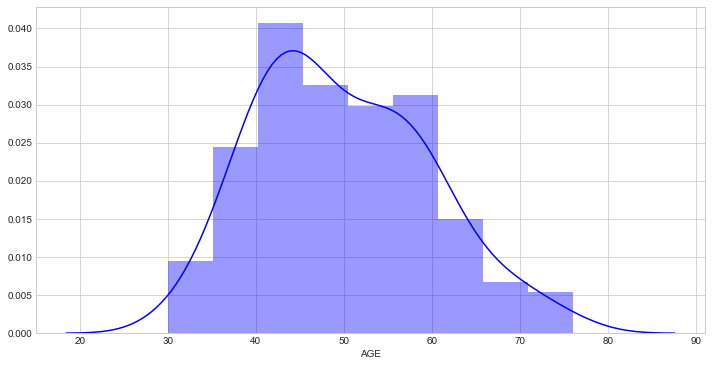

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(pres_cdt['AGE'],color='blue')

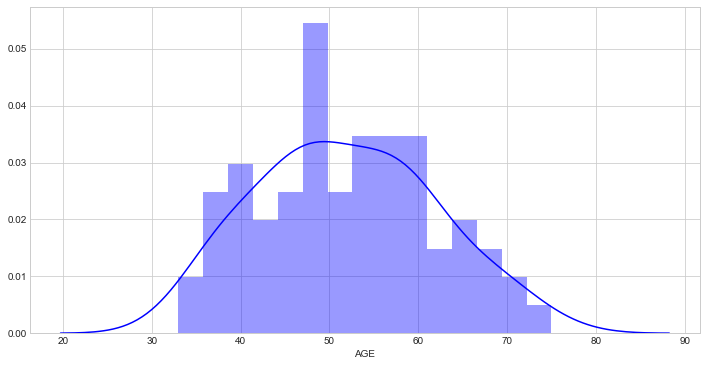

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(pres_only['AGE'],bins=15,color='blue')

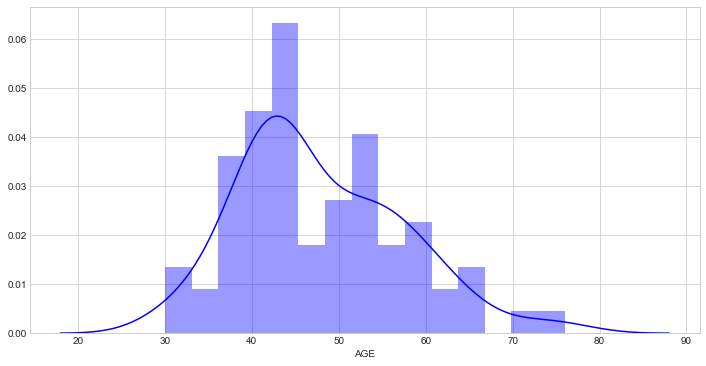

In [46]:
plt.figure(figsize=(12,6))
sns.distplot(vice_only['AGE'],bins=15,color='blue')

The age distributions for all the dataset is rougly normal. Thus candidates are equally as likely to be young as to be old.

Let us now explore the age feature

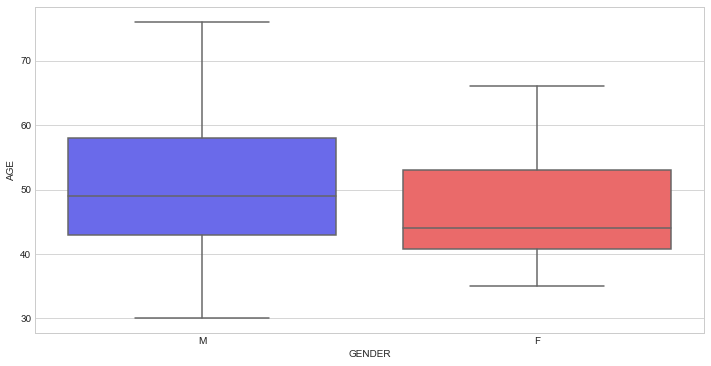

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=pres_cdt,x='GENDER',y='AGE',palette='seismic')

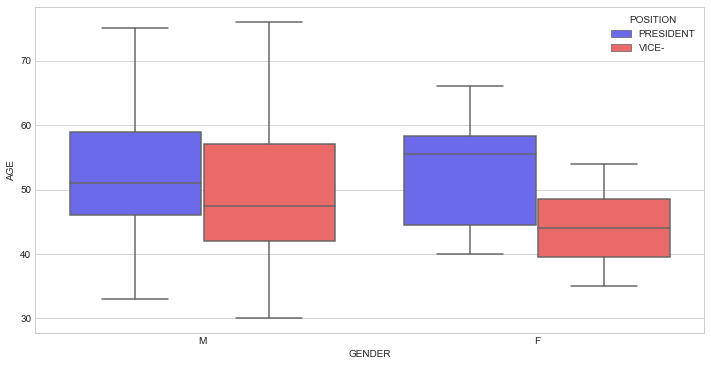

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=pres_cdt,x='GENDER',y='AGE',hue='POSITION',palette='seismic')

From the first plot, it can be seen that average age for all the female candidates is about five years less than that of their male counterparts. When seperated by position, it can be easily seen that while presidential candidates are generally on an average older than the vice-presidential candidates, the difference is less pronouced in males than females. It is interesting to know that the average age for female presidential candidates is about four years higher than that of male presidential candidates. Generally, the age range is lesser for female candidates than males.

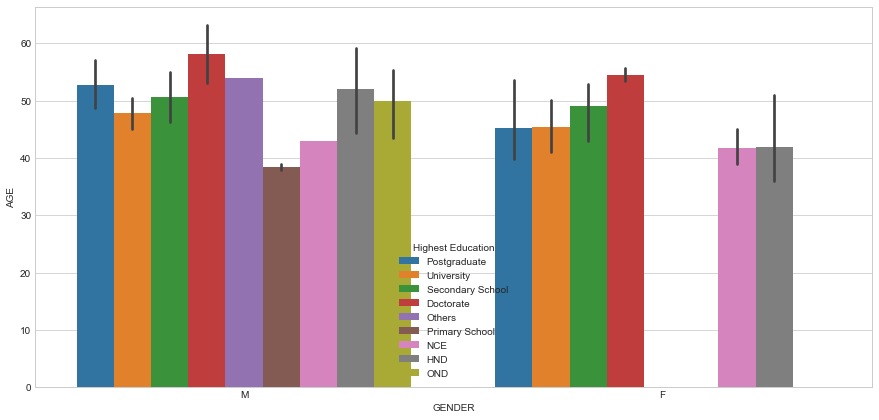

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(data=pres_cdt,x='GENDER',y='AGE',hue='Highest Education')

There seem to be no direct relationship between the level of education and the average age of candidates with that level of education for both sexes

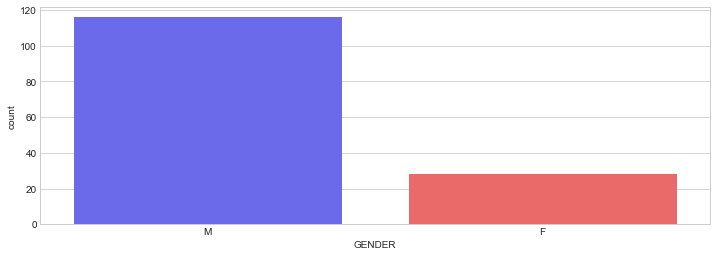

In [50]:
plt.figure(figsize=(12,4))
sns.countplot(data=pres_cdt,x='GENDER',palette='seismic')

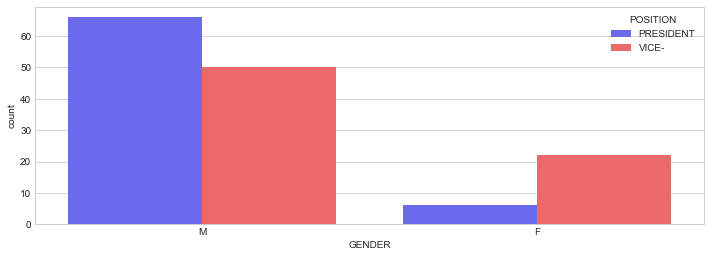

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(data=pres_cdt,x='GENDER',hue='POSITION',palette='seismic')

It is evident that there are far more men in the general candidates' list than female (about 3.5x more than females). The ratio of male presidential candidates to female is about 13:1. Most female candidates are vice-presidential candidates (about 4x more than the female presidential candidates.

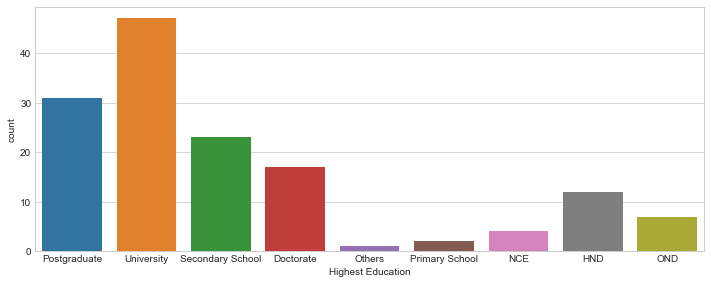

In [52]:
plt.figure(figsize=(12,4.5))
sns.countplot(data=pres_cdt,x='Highest Education')

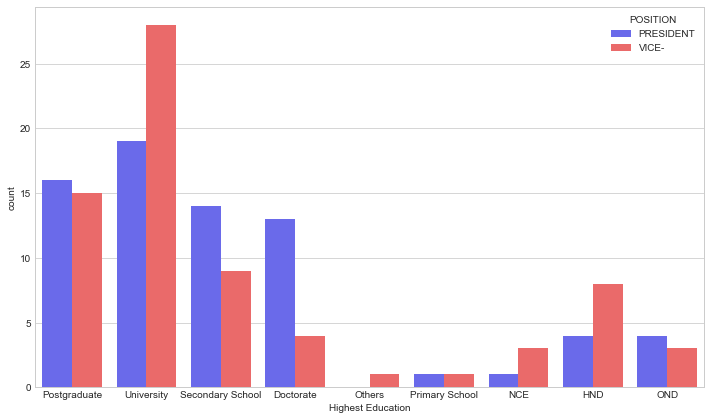

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(data=pres_cdt,x='Highest Education',hue='POSITION',palette='seismic')

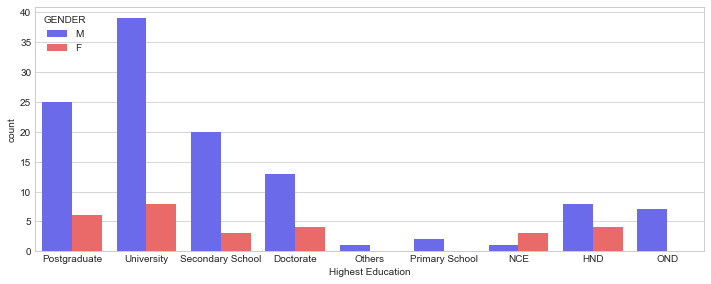

In [54]:
plt.figure(figsize=(12,4.5))
sns.countplot(data=pres_cdt,x='Highest Education',hue='GENDER',palette='seismic')

The most popular level of education for all the candidates is the university education. Postgraduate comes in second while secondary school comes in third.

Exploring for the specific position, it is clear the trend still remains. Exploring for gender, it is seen that females are more likely to have a doctorate or an HND than a secondary school certificate

Finally, I pivoted the candidates list and then plotted the age of the Vice-Presidential candidates to the Presidential Candidates for each party. This helps see at a glance the parties whose candidates are generally very old or vice-versa or an interesting mix.

In [55]:
df=pres_cdt.pivot_table(index='PARTY',values='AGE',columns='POSITION')
df.reset_index(level=0, inplace=True)

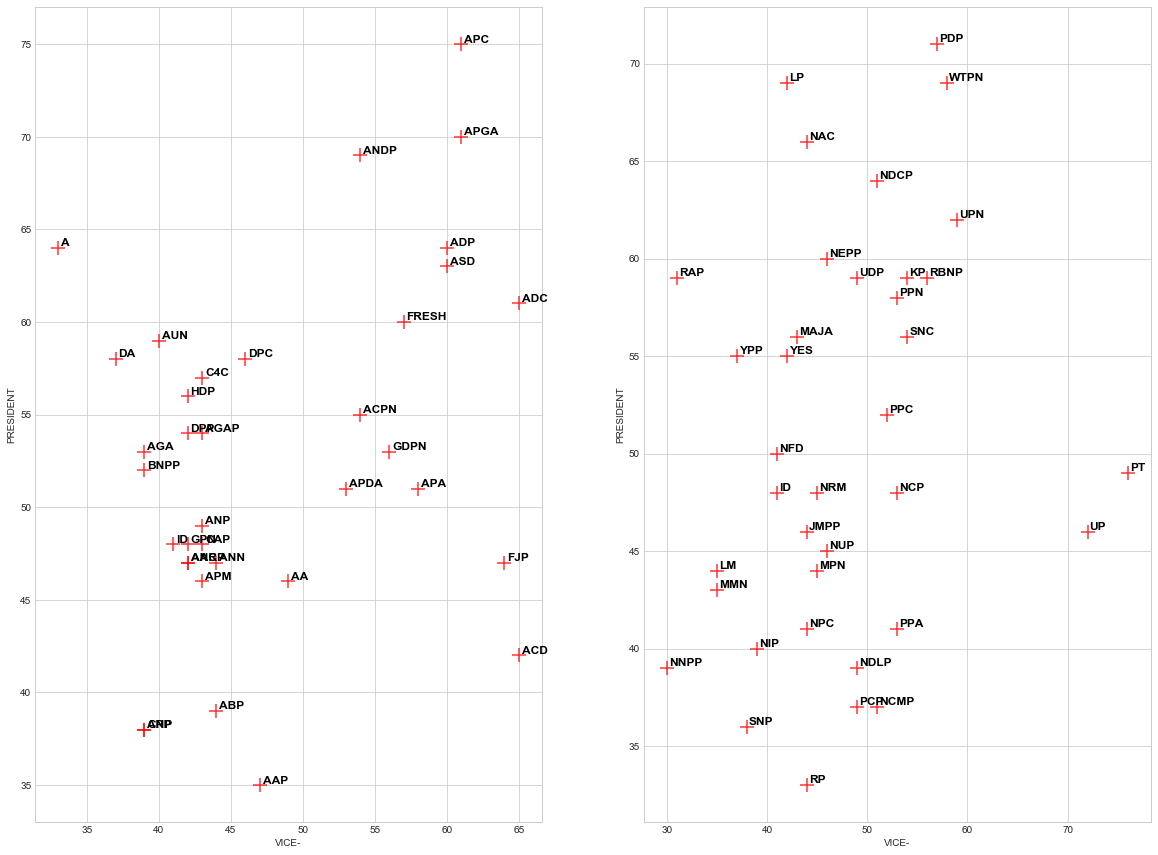

In [56]:
f, (axs1,axs2) = plt.subplots(1,2,figsize=(20,15))

p1=sns.regplot(data=df[0:int(df.shape[0]/2)], y="PRESIDENT", x="VICE-", fit_reg=False, marker="+", color="red", scatter_kws={'s':200},ax=axs1)
p2=sns.regplot(data=df[int(df.shape[0]/2)-1:df.shape[0]], y="PRESIDENT", x="VICE-", fit_reg=False, marker="+", color="red", scatter_kws={'s':200},ax=axs2)

# add annotations one by one with a loop
for line in range(0,int(df.shape[0]/2)):
     p1.text(df['VICE-'][line]+0.2, df["PRESIDENT"][line]+0.1, df["PARTY"][line], horizontalalignment='left', size='large', color='black', weight='semibold')
        
for line in range(int(df.shape[0]/2)-1,df.shape[0]):
     p2.text(df['VICE-'][line]+0.2, df["PRESIDENT"][line]+0.1, df["PARTY"][line], horizontalalignment='left', size='large', color='black', weight='semibold')

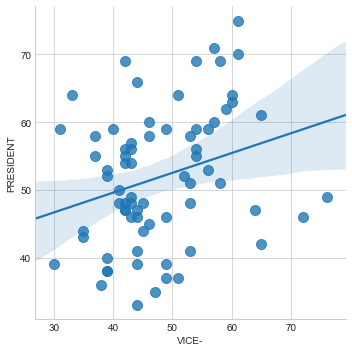

In [57]:
plt.figure(figsize=(20,20))
sns.lmplot(data=df, y="PRESIDENT", x="VICE-", fit_reg=True, scatter_kws={'s':100})

It can be seen that in general the higher the age of the vice-presidential candidate, the higher the age of the presidential candidate.